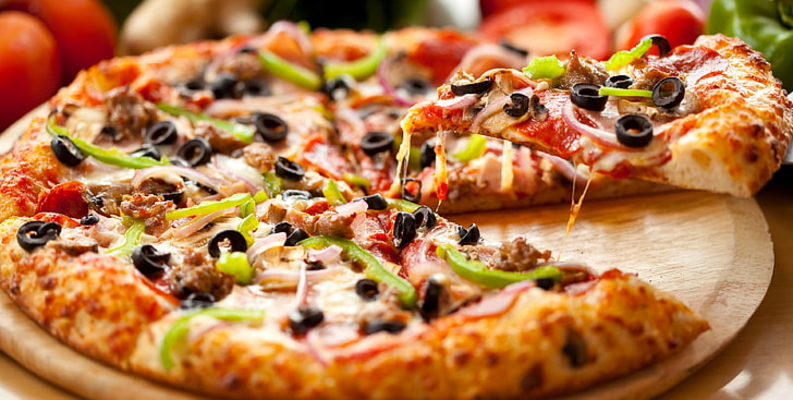

# PIZZA SALES ANALYSIS

 ## GROUP A1 (SNIGDHA CHIGURUPATI, SAHITH TODUPUNURI, DEEPAK NAZARI SAI)

### Importing the libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Reading the pizza sales data into a variable

In [2]:
pizzasales_df = pd.read_excel('Data Model - Pizza Sales.xlsx')

In [3]:
pizzasales_df.sample(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
19707,19708,8666,ital_veggie_m,1,2015-05-25,18:02:54,16.75,16.75,M,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza
36206,36207,15985,the_greek_xl,1,2015-09-26,20:25:42,25.50,25.50,XL,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",The Greek Pizza
23406,23407,10287,ital_veggie_m,1,2015-06-22,13:15:45,16.75,16.75,M,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza
15325,15326,6723,big_meat_s,1,2015-04-23,16:43:14,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza
45202,45203,19868,cali_ckn_s,1,2015-12-04,14:14:01,12.75,12.75,S,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza


### Checking if the data has null values

In [4]:
pizzasales_df.isnull().values.any()

False

### Question 1 : Add a new column to the dataframe with the number of ingeredients (pizza_ingredients) used for a pizza.

In [5]:
ques1_ingr_list = []
for i in range(len(pizzasales_df)):
    ques1_ingredientcount = len(list(pizzasales_df.pizza_ingredients.iloc[i].split(",")))
    ques1_ingr_list.append(ques1_ingredientcount)

In [6]:
pizzasales_df['no_of_ingredients'] = ques1_ingr_list
pizzasales_df.sample(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,no_of_ingredients
37370,37371,16499,napolitana_s,1,2015-10-06,12:53:29,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,5
42799,42800,18826,ckn_pesto_s,1,2015-11-17,19:30:35,12.75,12.75,S,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",The Chicken Pesto Pizza,6
11170,11171,4901,mexicana_l,1,2015-03-24,14:42:01,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,8
2640,2641,1164,veggie_veg_m,1,2015-01-20,15:13:31,16.00,16.00,M,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",The Vegetables + Vegetables Pizza,8
32632,32633,14418,sicilian_s,1,2015-08-29,13:02:11,12.25,12.25,S,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza,6


### Question 2 : Finding out the maximum and minimum number of ingredients in this data. And how this is distributed in the dataset.

In [7]:
print('The maximum no of ingredients in the given data is :',str(pizzasales_df['no_of_ingredients'].max()))

The maximum no of ingredients in the given data is : 8


In [8]:
print('The maximum no of ingredients in the given data is :',str(pizzasales_df['no_of_ingredients'].min()))

The maximum no of ingredients in the given data is : 2


In [9]:
# Knowing the no of pizzas which use specific no of ingredients
pizzasales_df.groupby(['no_of_ingredients']).size().reset_index(name='count').sort_values(by='count',ascending=False)

,no_of_ingredients,count
4,6,17901
3,5,11408
6,8,5791
1,3,5140
5,7,4200
0,2,2369
2,4,1811


Text(0.5, 1.0, 'No_of_Ingredients distribution')

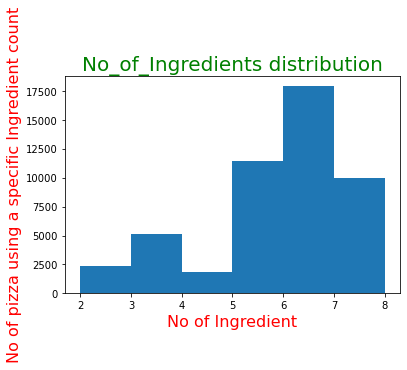

In [10]:
# Plotting the ingredient distribution(above results) in the dataset
plt.hist(pizzasales_df['no_of_ingredients'],bins = [2,3,4,5,6,7,8])
plt.xlabel("No of Ingredient",size=16,color='red')
plt.ylabel("No of pizza using a specific Ingredient count",size=16,color='red')
plt.title("No_of_Ingredients distribution",size=20,color='green')
# Have used bins from 2 till 8 because, the min and max ingredients are 2 & 8 respectively.

It can be observed that, most pizzas are sold with 6 ingredients in them and least pizzas were sold with 
4 ingredints in them

### Question 3 : To determine how ingredients count is in demand for diffrent pizza sizes

In [11]:
ques3_groupby = pizzasales_df.groupby(['pizza_size','no_of_ingredients']).size().reset_index(name='count').sort_values(
                                                                                    by='count',ascending=False)
ques3_pivoted = ques3_groupby.pivot(index='pizza_size',columns='no_of_ingredients',values='count')

Text(0.5, 1.0, 'In-demand Ingredient count of all pizza depending on its size')

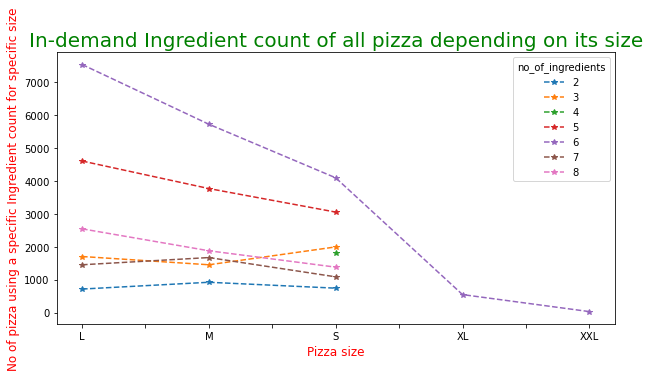

In [12]:
ques3_pivoted.plot(kind='line',figsize=(10,5),linestyle="--",marker="*")
plt.xlabel("Pizza size",size=12,color='red')
plt.ylabel("No of pizza using a specific Ingredient count for specific size",size=12,color='red')
plt.title("In-demand Ingredient count of all pizza depending on its size",size=20,color='green')

1. Most of the pizza customers preferred to have 6 ingredients for all sizes of pizza followed by 5 ingredients.
2. Customers who preferred only 4 ingredients had ordered only small size pizza
3. XL and XXL pizza sizes were preferred with only 6 ingredients

### Question 4 : List of unique ingredients in the whole data set 

In [13]:
pizza_ingredients_unique = []
for x in pizzasales_df['pizza_ingredients']:
    for y in x.split(", "):
        pizza_ingredients_unique.append(y)
pizza_ingredients_unique = list(set(pizza_ingredients_unique))
pizza_ingredients_unique.sort()
pizza_ingredients_unique

['Alfredo Sauce',
 'Anchovies',
 'Artichoke',
 'Artichokes',
 'Arugula',
 'Asiago Cheese',
 'Bacon',
 'Barbecue Sauce',
 'Barbecued Chicken',
 'Beef Chuck Roast',
 'Blue Cheese',
 'Brie Carre Cheese',
 'Calabrese Salami',
 'Capocollo',
 'Caramelized Onions',
 'Chicken',
 'Chipotle Sauce',
 'Chorizo Sausage',
 'Cilantro',
 'Coarse Sicilian Salami',
 'Corn',
 'Eggplant',
 'Feta Cheese',
 'Fontina Cheese',
 'Friggitello Peppers',
 'Garlic',
 'Genoa Salami',
 'Goat Cheese',
 'Gorgonzola Piccante Cheese',
 'Gouda Cheese',
 'Green Olives',
 'Green Peppers',
 'Italian Sausage',
 'Jalapeno Peppers',
 'Kalamata Olives',
 'Luganega Sausage',
 'Mozzarella Cheese',
 'Mushrooms',
 'Onions',
 'Oregano',
 'Pancetta',
 'Parmigiano Reggiano Cheese',
 'Pears',
 'Peperoncini verdi',
 'Pepperoni',
 'Pesto Sauce',
 'Pineapple',
 'Plum Tomatoes',
 'Prosciutto',
 'Prosciutto di San Daniele',
 'Provolone Cheese',
 'Red Onions',
 'Red Peppers',
 'Ricotta Cheese',
 'Romano Cheese',
 'Sliced Ham',
 'Smoked Gouda

In [14]:
len(pizza_ingredients_unique)

65

### Creating a copy of the dataset

In [15]:
pizzasales_df_copy = pizzasales_df.copy()

### Question 5 : Split the pizza_ingredients column into multiple columns, one for each ingredient.

In [16]:
pizzasales_df_copy[['Ingredient_1','Ingredient_2','Ingredient_3','Ingredient_4','Ingredient_5','Ingredient_6',
               'Ingredient_7','Ingredient_8']] = pizzasales_df_copy.pizza_ingredients.str.split(",",expand=True)

In [17]:
pizzasales_df_copy.sample(10)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,...,pizza_name,no_of_ingredients,Ingredient_1,Ingredient_2,Ingredient_3,Ingredient_4,Ingredient_5,Ingredient_6,Ingredient_7,Ingredient_8
28299,28300,12466,peppr_salami_l,1,2015-07-27,17:13:50,20.75,20.75,L,Supreme,...,The Pepper Salami Pizza,6,Genoa Salami,Capocollo,Pepperoni,Tomatoes,Asiago Cheese,Garlic,None,None
11832,11833,5200,sicilian_s,1,2015-03-29,12:32:07,12.25,12.25,S,Supreme,...,The Sicilian Pizza,6,Coarse Sicilian Salami,Tomatoes,Green Olives,Luganega Sausage,Onions,Garlic,None,None
23824,23825,10472,spicy_ital_m,1,2015-06-25,15:03:45,16.50,16.50,M,Supreme,...,The Spicy Italian Pizza,6,Capocollo,Tomatoes,Goat Cheese,Artichokes,Peperoncini verdi,Garlic,None,None
21816,21817,9575,four_cheese_l,1,2015-06-10,12:20:23,17.95,17.95,L,Veggie,...,The Four Cheese Pizza,5,Ricotta Cheese,Gorgonzola Piccante Cheese,Mozzarella Cheese,Parmigiano Reggiano Cheese,Garlic,None,None,None
7754,7755,3413,peppr_salami_s,1,2015-02-27,12:54:17,12.50,12.50,S,Supreme,...,The Pepper Salami Pizza,6,Genoa Salami,Capocollo,Pepperoni,Tomatoes,Asiago Cheese,Garlic,None,None
5204,5205,2307,spinach_fet_l,1,2015-02-08,12:51:06,20.25,20.25,L,Veggie,...,The Spinach and Feta Pizza,5,Spinach,Mushrooms,Red Onions,Feta Cheese,Garlic,None,None,None
6039,6040,2675,veggie_veg_s,1,2015-02-14,14:41:49,12.00,12.00,S,Veggie,...,The Vegetables + Vegetables Pizza,8,Mushrooms,Tomatoes,Red Peppers,Green Peppers,Red Onions,Zucchini,Spinach,Garlic
30150,30151,13320,cali_ckn_s,1,2015-08-10,18:34:06,12.75,12.75,S,Chicken,...,The California Chicken Pizza,7,Chicken,Artichoke,Spinach,Garlic,Jalapeno Peppers,Fontina Cheese,Gouda Cheese,None
31354,31355,13843,ital_cpcllo_l,1,2015-08-19,12:15:22,20.50,20.50,L,Classic,...,The Italian Capocollo Pizza,6,Capocollo,Red Peppers,Tomatoes,Goat Cheese,Garlic,Oregano,None,None
35222,35223,15552,spinach_fet_m,1,2015-09-17,15:11:14,16.00,16.00,M,Veggie,...,The Spinach and Feta Pizza,5,Spinach,Mushrooms,Red Onions,Feta Cheese,Garlic,None,None,None


### Question 6 : A table of ingredients showing how many times each ingredient is used in the dataset

In [18]:
ques6_ingredients_count = pizzasales_df['pizza_ingredients'].str.split(',').apply(lambda x: [e.strip() for e in x]).explode() 
ques6_count_df = pd.DataFrame(ques6_ingredients_count.value_counts().reset_index())
ques6_count_df.columns = ['pizza_ingredients','count']
ques6_count_df_new = ques6_count_df.sort_values(by='pizza_ingredients',inplace=False)
ques6_count_df_new

,pizza_ingredients,count
53,Alfredo Sauce,980
43,Anchovies,1451
30,Artichoke,2302
11,Artichokes,5682
44,Arugula,1428
...,...,...
29,Thai Sweet Chilli Sauce,2315
64,Thyme,480
1,Tomatoes,26601
25,Zucchini,2485


C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24923 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24923 missing from current font.
  font.set_text(s, 0, flags=flags)


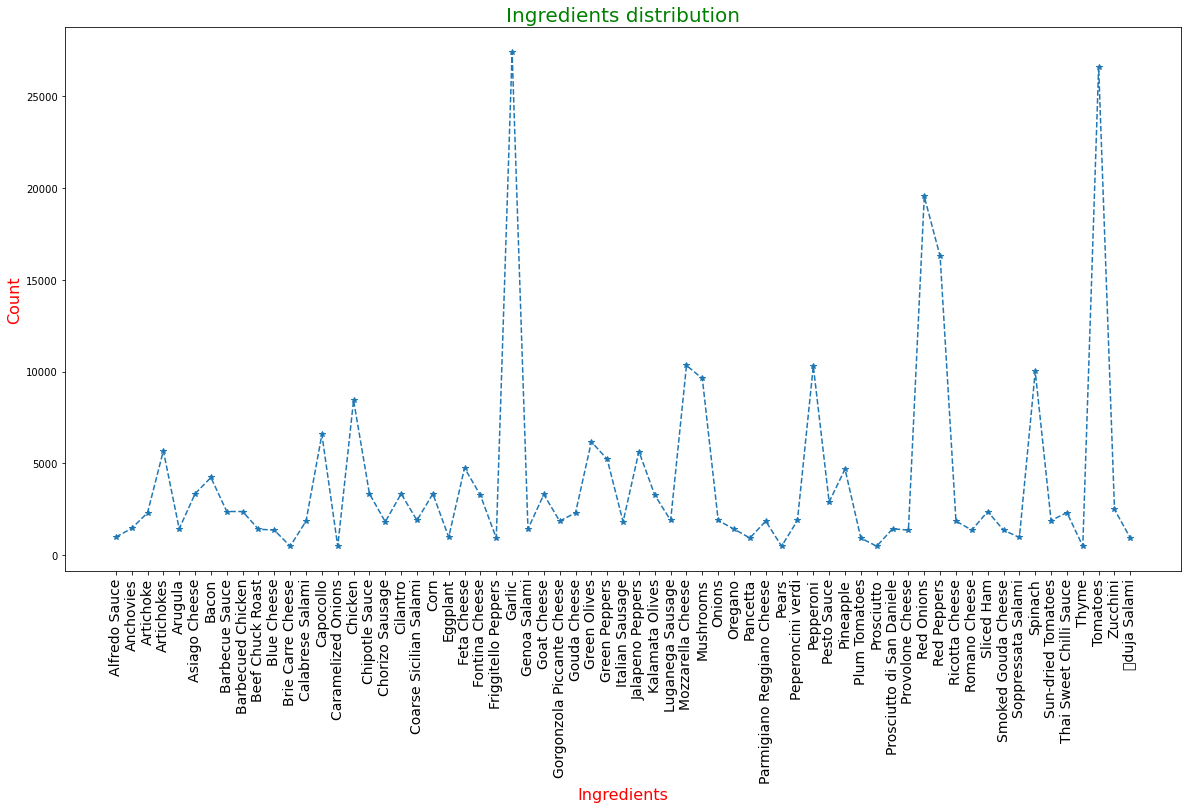

In [19]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90,size=14)
plt.xlabel("Ingredients",size=16,color='red')
plt.ylabel("Count",size=16,color='red')
plt.title("Ingredients distribution",size=20,color='green')
plt.plot(ques6_count_df_new['pizza_ingredients'],ques6_count_df_new['count'],marker='*',linestyle='--')

By this it is clear that Garlic and Tomatoes are not just more used but they are significantly (like almost three times)
more number of times used when compared to other ingredients.

### Question 7 : To know which pizza type/style(mexican pizza,Italian Supreme pizza etc.) sell most and which pizza sells least. Also, plotting the graph for the same

In [20]:
pizzasales_df.pizza_name.value_counts().head(1)

The Classic Deluxe Pizza    2416
Name: pizza_name, dtype: int64

In [21]:
pizzasales_df.pizza_name.value_counts().tail(1)

The Brie Carre Pizza    480
Name: pizza_name, dtype: int64

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'pizza type distribution'}, xlabel='pizza_name', ylabel='count'>

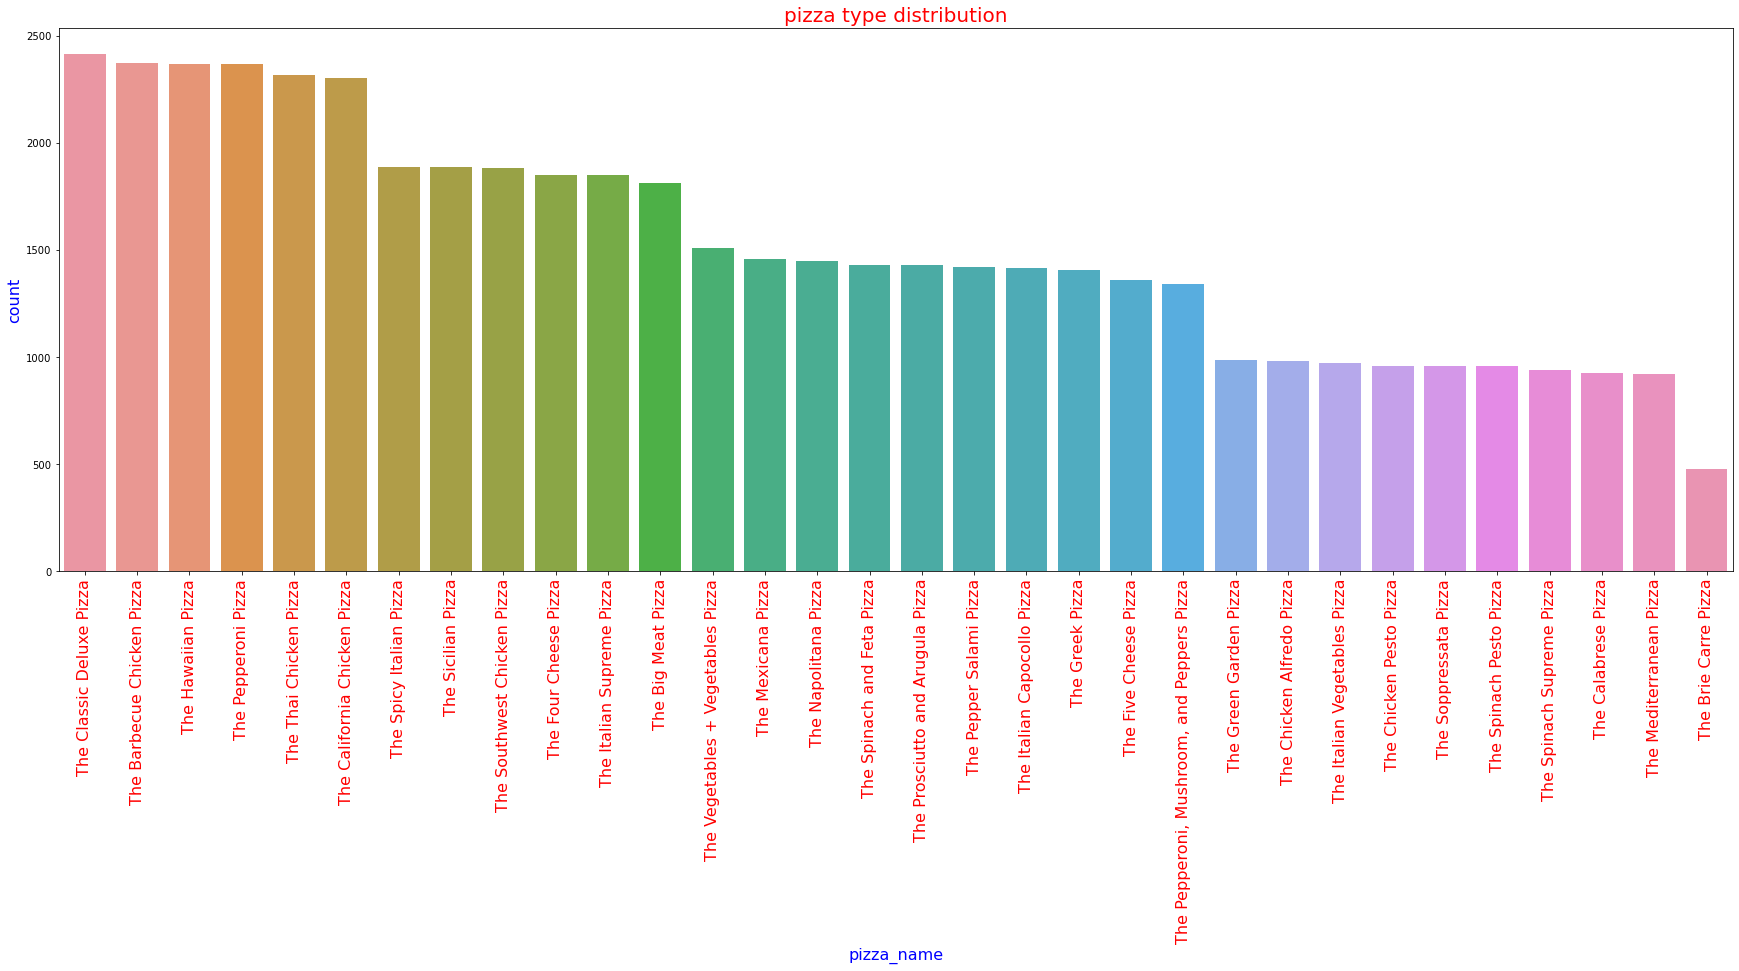

In [22]:
# plotting the graph
plt.figure(figsize=(30,10))
ques7_pizzastyle = pizzasales_df.groupby(['pizza_name']).size().reset_index(name='count').sort_values(
    by='count',ascending=False)
plt.xticks(color='red',rotation=90,size=16)
plt.xlabel("Pizza name",size=16,color='blue')
plt.ylabel("Count",size=16,color='blue')
plt.title("pizza type distribution",size=20,color='red')
sns.barplot(ques7_pizzastyle['pizza_name'],ques7_pizzastyle['count'])

### Question 8 : To know which ingredients are in demand and which are least used

In [23]:
print('The top 10 ingredients which are used mostly and no of times used are as below :')
print(ques6_ingredients_count.value_counts().head(10))
ques8_ingredientcount = ques6_ingredients_count.value_counts()

The top 10 ingredients which are used mostly and no of times used are as below :
Garlic               27422
Tomatoes             26601
Red Onions           19547
Red Peppers          16284
Mozzarella Cheese    10333
Pepperoni            10300
Spinach              10012
Mushrooms             9624
Chicken               8443
Capocollo             6572
Name: pizza_ingredients, dtype: int64


<AxesSubplot:>

C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24923 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\snigdha.chigurupati\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 24923 missing from current font.
  font.set_text(s, 0, flags=flags)


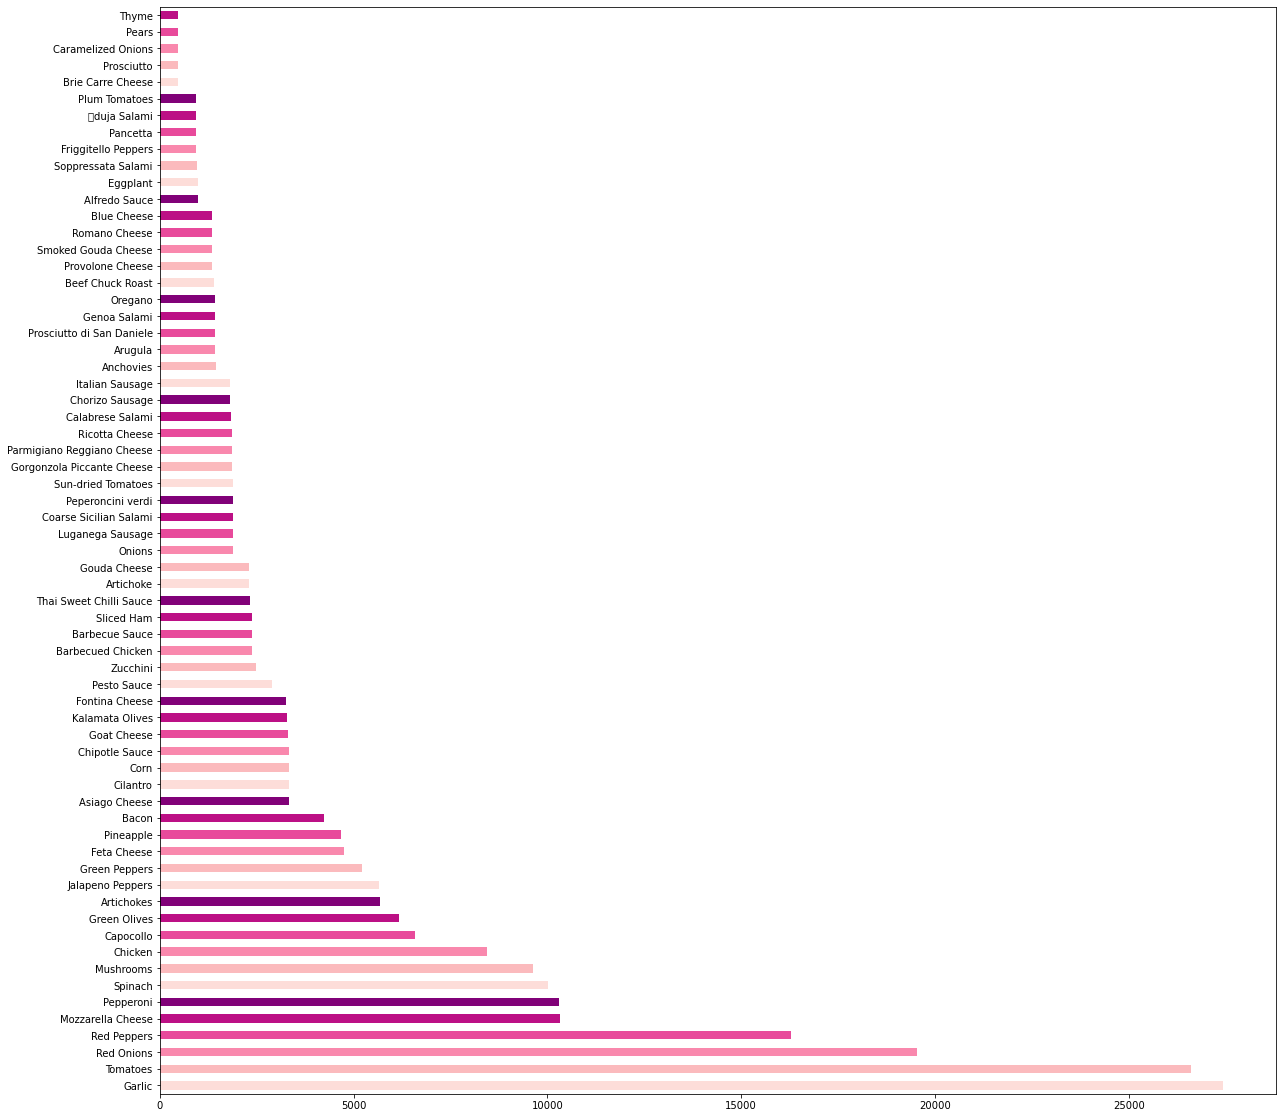

In [24]:
# Plotting the ingredients to know which are in more demand and less demand.
plt.figure(figsize=(20,20))
ques8_color = sns.color_palette("RdPu")
ques8_ingredientcount.plot.barh(x = 'pizza_ingredients', y = 'count', color = ques8_color )

From the above plot, it can be seen that:
1. Ingredients in more demand: Garlic, Tomatoes, Red Onions, Red Peppers and Mozzarella Cheese
2. Ingredients in least demand : Thyme, Pears, Caramalized Onions,Proscuitto, Brie carre chesse

### Adding all the required columns to the dataset

In [25]:
# order_monthnum means jan=1, feb=2, mar=3 etc.
pizzasales_df['order_monthnum'] = pizzasales_df['order_date'].dt.month

# order_month means extracting month name from order_date column
pizzasales_df['order_month'] = pizzasales_df['order_date'].dt.month_name()

# order_dayofmonth means, 1,2,3...31 in Jan, 1,2,..28 in feb, 1,2,..31 in march etc.
pizzasales_df['order_dayofmonth'] = pizzasales_df['order_date'].dt.day

# order_dayname means monday, tues, wed etc
pizzasales_df['order_dayname'] = pizzasales_df['order_date'].dt.day_name()

# order_daynum means mon = 0, tues =1,...sun = 6
pizzasales_df['order_daynum'] = pizzasales_df['order_date'].dt.weekday

# order_week means 1,2..52
pizzasales_df['order_week'] = pizzasales_df['order_date'].dt.week

# Converting the order_time into string
pizzasales_df['order_time']=pizzasales_df['order_time'].astype('string')

# Adding three new columns by spliting them with ":"
pizzasales_df[['Hour','Minute', 'Second']]= pizzasales_df['order_time'].str.split(":",expand=True)

C:\Users\SNIGDH~1.CHI\AppData\Local\Temp/ipykernel_3744/1638564753.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  pizzasales_df['order_week'] = pizzasales_df['order_date'].dt.week


In [26]:
pizzasales_df.sample(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,...,no_of_ingredients,order_monthnum,order_month,order_dayofmonth,order_dayname,order_daynum,order_week,Hour,Minute,Second
25424,25425,11182,southw_ckn_l,1,2015-07-06,13:30:06,20.75,20.75,L,Chicken,...,8,7,July,6,Monday,0,28,13,30,06
28609,28610,12605,spinach_supr_l,1,2015-07-30,12:26:58,20.75,20.75,L,Supreme,...,8,7,July,30,Thursday,3,31,12,26,58
38218,38219,16858,bbq_ckn_s,1,2015-10-13,17:31:58,12.75,12.75,S,Chicken,...,6,10,October,13,Tuesday,1,42,17,31,58
23370,23371,10278,hawaiian_s,1,2015-06-22,12:28:42,10.50,10.50,S,Classic,...,3,6,June,22,Monday,0,26,12,28,42
30351,30352,13413,southw_ckn_m,1,2015-08-12,13:12:10,16.75,16.75,M,Chicken,...,8,8,August,12,Wednesday,2,33,13,12,10


### Question 9 : Are there more (or less) sales of a certain type/style of pizza in a certain month, or weekday, or time of the day

##### Question 9.1 - To know the sales of pizza types per monthwise

In [27]:
ques9_1_groupby = (pizzasales_df.groupby(['pizza_name','order_month']).size().reset_index(name='count'))

In [28]:
ques9_groupby_ordermonth = ques9_1_groupby.pivot(index='pizza_name',columns='order_month',values='count' )

Using heatmap visualization for all sub-questions since it becomes easier to compare and interpret.

<AxesSubplot:xlabel='order_month', ylabel='pizza_name'>

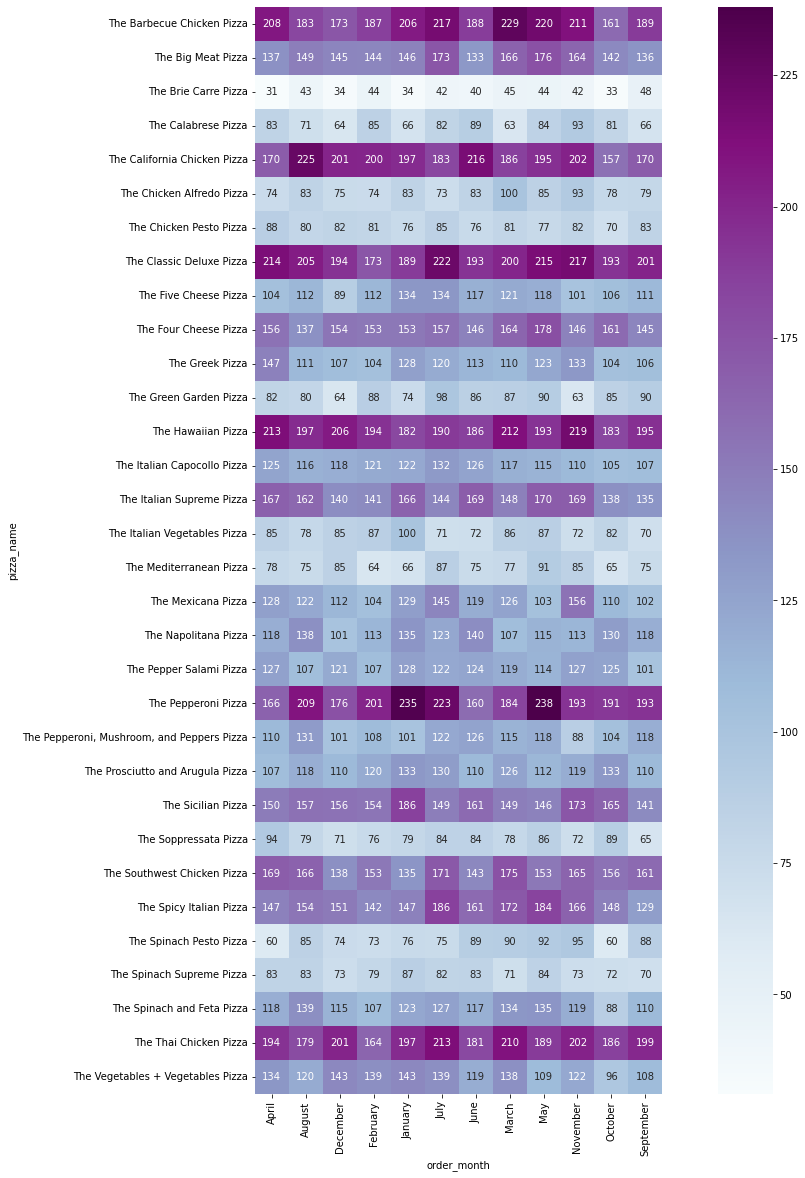

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(ques9_groupby_ordermonth, cmap = 'BuPu', fmt = 'g', square = True,  annot = True)

The above heatmap states sales of each type of pizza for each month. The below are the most selling pizzas:
1. January - The Pepperoni pizza
2. February - The Pepperoni pizza
3. March - The Barbeque chicken pizza
4. April - The Classic Deluxe pizza
5. May - The Pepperoni pizza
6. June - The California chicken pizza
7. July - The Pepperoni pizza
8. August - The California chicken pizza
9. September - The Classic Deluxe pizza
10. October - The Classic Deluxe pizza
11. November - The Hawaiian pizza
12. December - The Hawaiian pizza

At first, from the above results, it may seem that, The Pepperoni pizza was the most selling type of pizza followed by 
The Classic Deluxe pizza. But the Pepperoni sales were very low for rest of the months like 160 in June, 166 in April. However, for other pizzas, like The Classic Deluxe pizza, The Barbeque pizza and the Hawaiian pizza, the sales for any month were never below 170. This explains, why The Pepperoni pizza was the fourth most popular pizza with the top 3 most popular being, The Classic Deluxe pizza, The Barbeque pizza and the Hawaiian pizza for the year(results from question 6).

##### Question 9.2 - To know the sales of pizza types per each day in a week for all months

In [30]:
ques9_2_groupby = (pizzasales_df.groupby(['pizza_name','order_dayname']).size().reset_index(name='count'))

In [31]:
ques9_groupby_orderdayofmonth = ques9_2_groupby.pivot(index='pizza_name',columns='order_dayname',values='count' )

<AxesSubplot:xlabel='order_dayname', ylabel='pizza_name'>

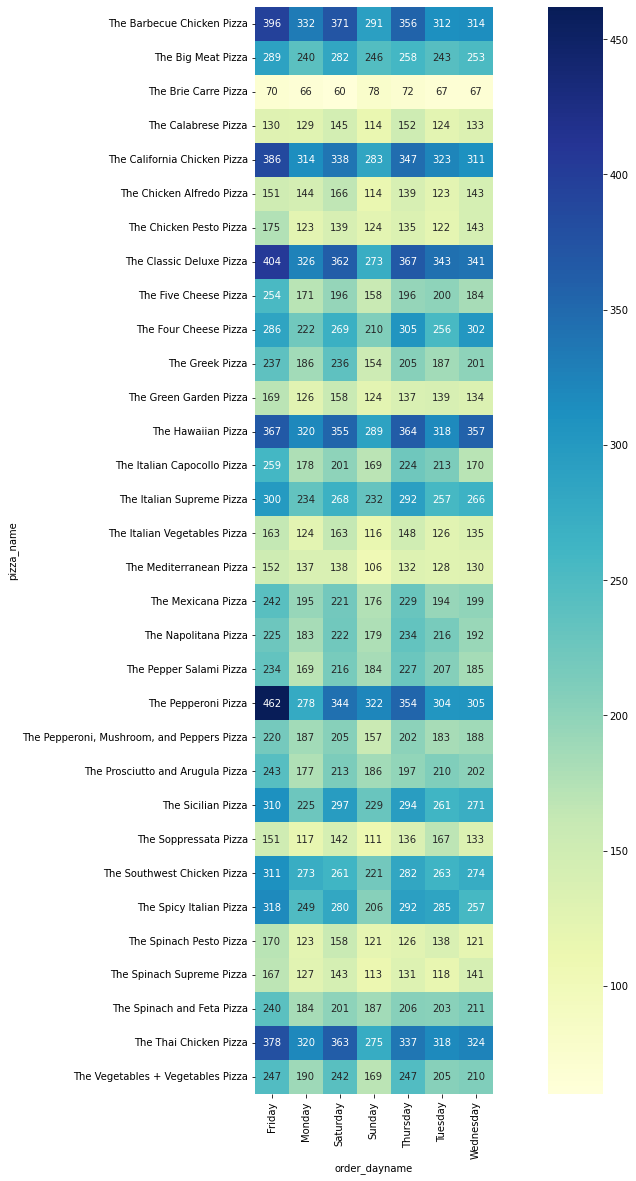

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(ques9_groupby_orderdayofmonth, cmap = 'YlGnBu', fmt = 'g', square = True,  annot = True)

If we observe the top most selling pizza's and their most selling day in the week:
1. Classic Deluxe pizza - Friday
2. Barbeque chicken pizza - Friday
3. Hawaiian pizza - Friday
4. Pepperoni pizza - Friday
5. The Thai chicken pizza - Friday

Also, for almost all pizza's, Friday had the more sales. So, it is understood that Friday was the busiest day

##### Question 9.3 - To know the sales of pizza types for each hour in all days

In [33]:
ques9_3_groupby = (pizzasales_df.groupby(['pizza_name','Hour']).size().reset_index(name='count'))

In [34]:
ques9_groupby_Hour = ques9_3_groupby.pivot(index='pizza_name',columns='Hour',values='count' )

<AxesSubplot:xlabel='Hour', ylabel='pizza_name'>

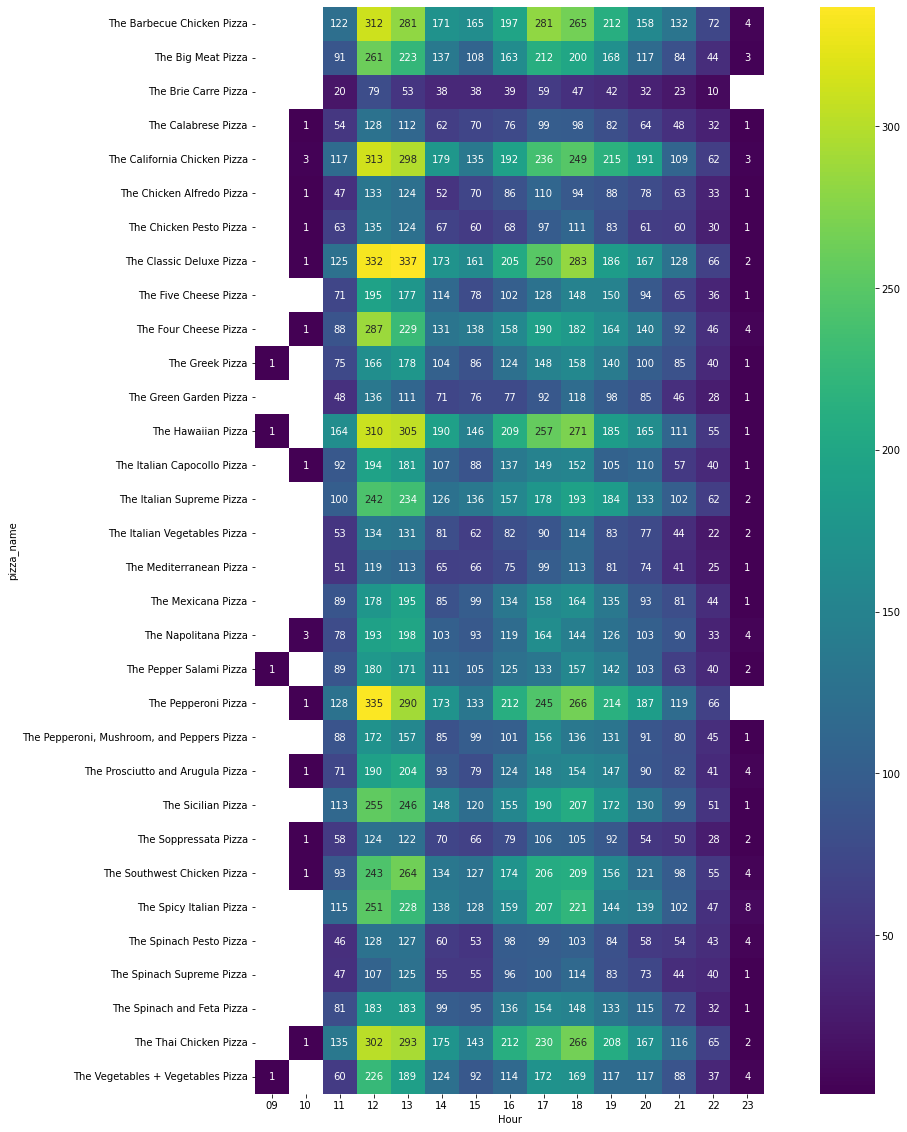

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(ques9_groupby_Hour, cmap = 'viridis', fmt = 'g', square = True,  annot = True)

For all the most selling pizzas, it can be easily noted that:
1. Sales are prominent only from 11 am till 9 pm and it starts to decrease after that.
2. There is drastic drop in sales from 9 pm to 10 pm and also from 10 pm till 11 pm.

Also, The above pattern is same for all the pizzas.

##### Summary

From all the results of Question 9, it can be inferred that:
1. The Pepperoni pizza was popular during the first half of the year. For the second half, both Classic Deluxe and            Hawaiian pizza were in demand.
2. For most pizzas, including the top 5 most selling, Friday had the most sales
3. Highest pizza sales for all types of pizzas occurred between 12 pm and 1 pm

### Question 10 : To determine which pizza_categories were sold more often

  pizza_category  count
0        Classic  14579
1        Supreme  11777
2         Veggie  11449
3        Chicken  10815


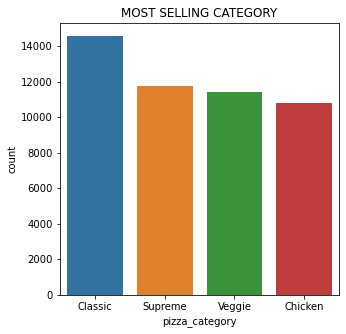

The most selling pizza by categoryand no of pizzas sold are below
pizza_category    Classic
count               14579
Name: 0, dtype: object


In [36]:
Topcategory=pizzasales_df.groupby("pizza_category")["order_id"].agg(["count"]).sort_values(by="count",ascending=False).reset_index().head()
print(Topcategory)
plt.figure(figsize=(5,5))
graph=sns.barplot(x='pizza_category',y='count',data=Topcategory)
graph.set_title('MOST SELLING CATEGORY')
plt.show()
print('The most selling pizza by categoryand no of pizzas sold are below')
print(Topcategory.loc[0])

### Question 11 : The distribution of pizza_category for all months

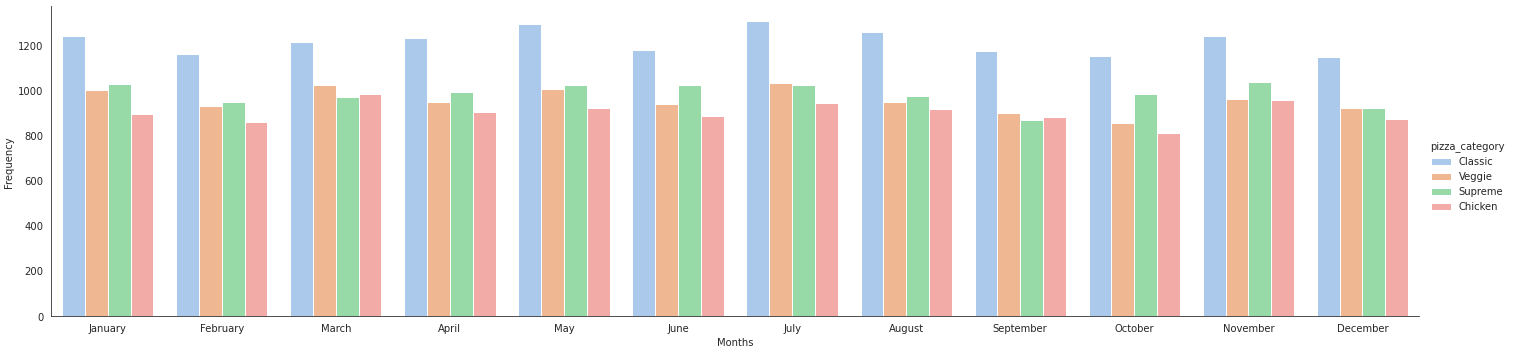

In [37]:
with sns.axes_style('white'):
    ques11_1 = sns.catplot(x="order_month", data=pizzasales_df, aspect=4.0, kind='count',hue='pizza_category',palette="pastel")
ques11_1.set_ylabels('Frequency')
ques11_1.set_xlabels("Months")
plt.show()

It can be observer that Classic is the most popular category given any month.

### Question 12 : To determine which pizza sizes are sold more often

  pizza_size  count
0          L  18526
1          M  15385
2          S  14137
3         XL    544
4        XXL     28


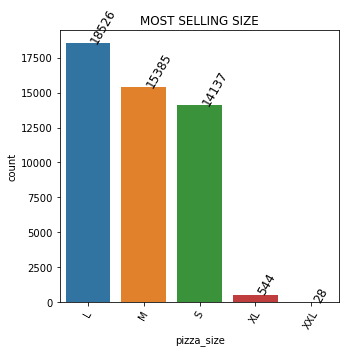

The most selling pizza by size and no of pizzas sold are below
pizza_size        L
count         18526
Name: 0, dtype: object


In [38]:
Topsize=pizzasales_df.groupby("pizza_size")["order_id"].agg(["count"]).sort_values(by="count",ascending=False).reset_index().head()
print(Topsize)
plt.figure(figsize=(5,5))
for i,v in enumerate(Topsize['count']):
    plt.text(i,v,str(v),size=12,rotation=60)
graph=sns.barplot(x='pizza_size',y='count',data=Topsize)
graph.set_title('MOST SELLING SIZE')
plt.xticks(rotation=60)
plt.show()
print('The most selling pizza by size and no of pizzas sold are below')
print(Topsize.loc[0])

### Question 13 : The distribution of pizza_size for all months

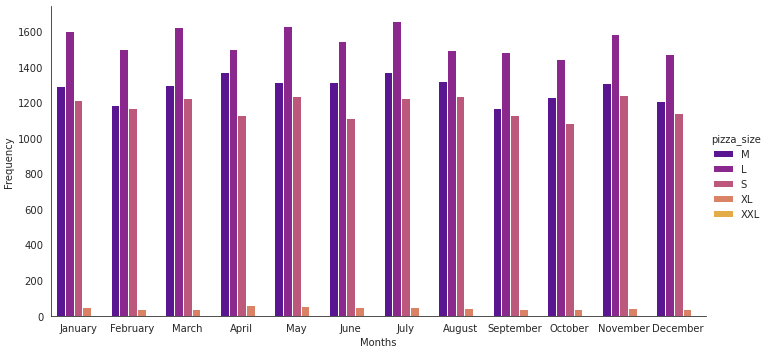

In [39]:
with sns.axes_style('white'):
    ques13_1 = sns.catplot(x="order_month", data=pizzasales_df, aspect=2.0, kind='count',hue='pizza_size',palette="plasma")
ques13_1.set_ylabels('Frequency')
ques13_1.set_xlabels("Months")
plt.show()

The Sales of “L” size are most sold.Since the pizza sales of XXL size are very low, it can not be seen in the graph. To know the sales distribution of XXL pizza sales for each month

In [40]:
pizzasales_df[pizzasales_df['pizza_size']=='XXL']['order_month'].value_counts()

April        4
February     3
March        3
May          3
September    3
November     3
January      2
June         2
August       2
October      2
December     1
Name: order_month, dtype: int64

So, April month sold more XXL pizzas in the year and none were sold in July.

### Question 14 : Is there a time of the day when there is a peak sale? If yes, does that depend on the day of the week, or month?

From the Summary of question 9, it is already know that, peak sale in a day occurs between "12 pm and 1 pm".Also, "Fridays" are the peak selling day in a week.

Now, checking if the peak sale varies for all weeks in the year or not.

In [41]:
ques14_groupby = pizzasales_df.groupby(['Hour','order_week']).size().reset_index(name='count').sort_values(by=
                                                                                                          'order_week')
ques14_1 = ques14_groupby.pivot(index='Hour',columns='order_week',values='count')

<AxesSubplot:xlabel='order_week', ylabel='Hour'>

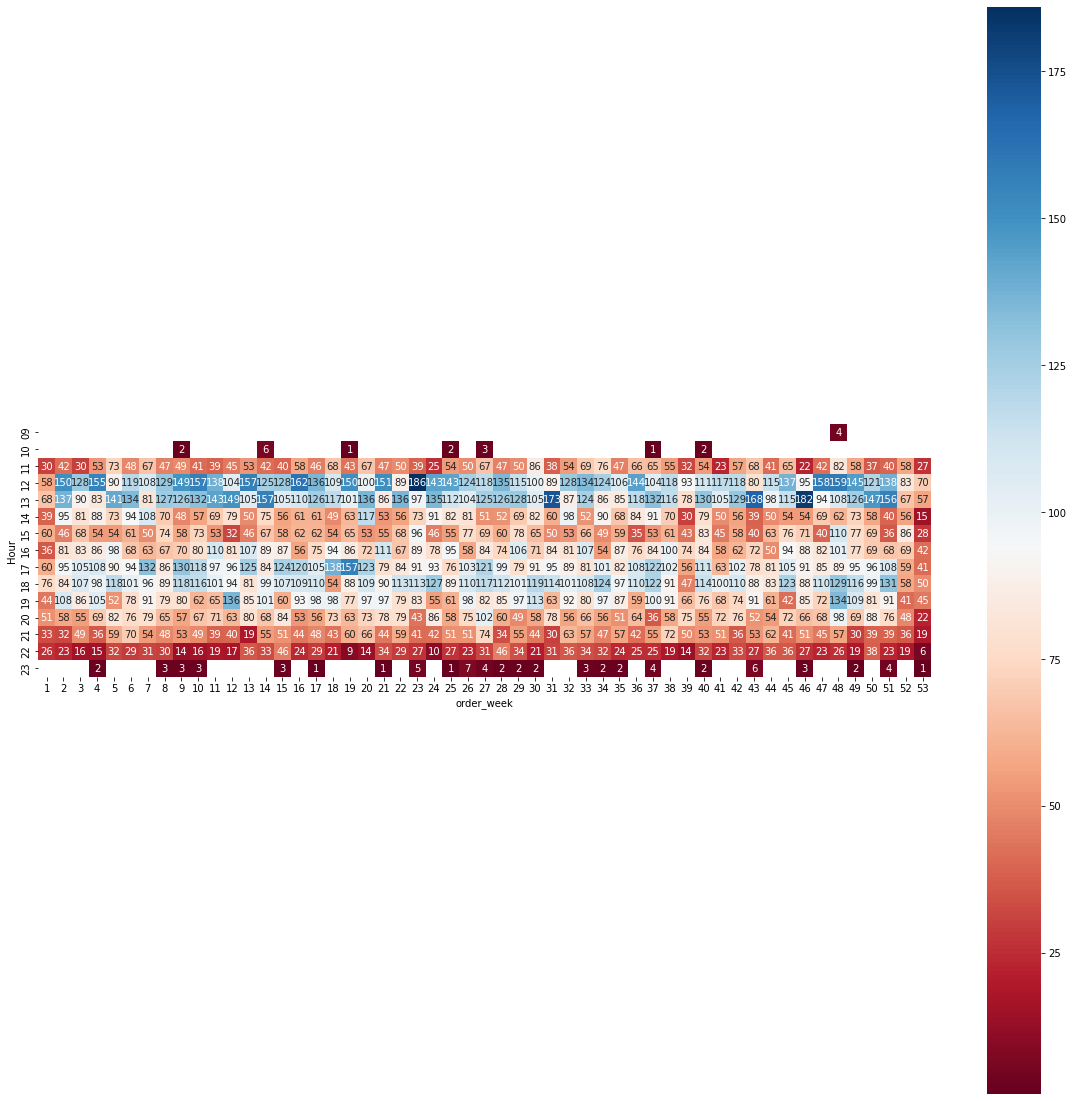

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(ques14_1, cmap = 'RdBu', fmt = 'g', square = True,  annot = True)

1. It can be seen that, mostly for all the weeks, highest peak sales occured between 12 pm and 1 pm. 
2. Also, sales were little high between 5 pm and 6 pm
3. The highest peak sales occurred on 23rd week of the year

## Question 15 to Question 18, Checking the sales per month, week_day, time etc.

### Question 15 : To determine the sales per week and plot it

Since, the data involves 52 or 53 weeks, dividing it into two subplots with around 26 weeks in each sub-plot

In [43]:
ques15_groupby = pizzasales_df.groupby(['order_week']).size().reset_index(name='count')
ques15_1 = ques15_groupby[(ques15_groupby['order_week']>0) & (ques15_groupby['order_week']<27)]
ques15_2 = ques15_groupby[(ques15_groupby['order_week']>26) & (ques15_groupby['order_week']<54)]

In [44]:
ques15_peaksales_1 = ques15_1.sum()['count']
print("The total number of pizzas sold for the weeks from 1 till 25(included) are {}".format(ques15_peaksales_1))

The total number of pizzas sold for the weeks from 1 till 25(included) are 24321


In [45]:
ques15_peaksales_2 = ques15_2.sum()['count']
print("The total number of pizzas sold for the weeks from 26 till 53(included) are {}".format(ques15_peaksales_2))

The total number of pizzas sold for the weeks from 26 till 53(included) are 24299


Both the halfs of the year made almost equal sales with very little difference

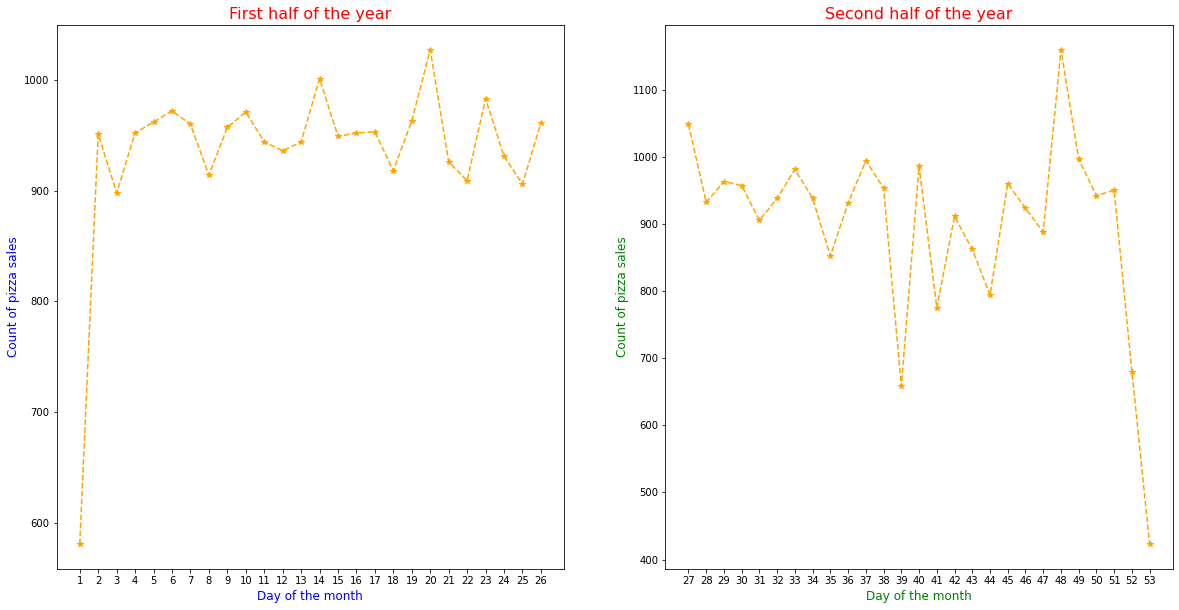

In [46]:
# Plotting the sub-graphs
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("First half of the year",size=16,color='red')
plt.xlabel("Day of the month",size=12,color='blue')
plt.ylabel("Count of pizza sales",size=12,color='blue')
plt.xticks(ques15_1['order_week'])
plt.plot(ques15_1['order_week'],ques15_1['count'],marker='*',linestyle='--',color='orange')

plt.subplot(122)
plt.title("Second half of the year",size=16,color='red')
plt.xlabel("Day of the month",size=12,color='green')
plt.ylabel("Count of pizza sales",size=12,color='green')
plt.xticks(ques15_2['order_week'])
plt.plot(ques15_2['order_week'],ques15_2['count'],marker='*',linestyle='--',color='orange')

The below can be inferred from the sub-plots:
1. It can be seen that least no of pizzas were sold in 53rd (last) week of the year followed by 1st week.
2. Highest sales occured in the 48th week.

### Question 16 : To determine the sales per month and plot it

<AxesSubplot:xlabel='order_month', ylabel='count'>

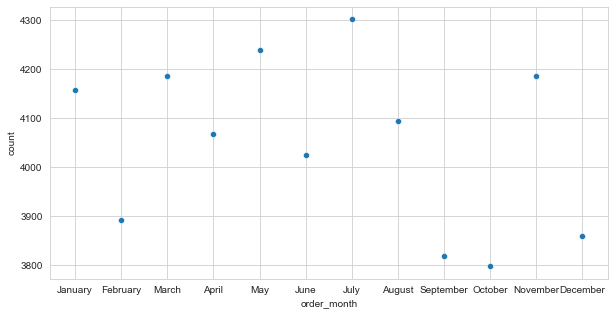

In [47]:
ques16_groupby = pizzasales_df.groupby(['order_month','order_monthnum']).size().reset_index(name='count').sort_values(
                                                                                       by='order_monthnum')
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data = ques16_groupby, x= 'order_month', y='count')

1. July had the most sales while October had least sales.
2. It can be noticed, the sales are never constant and almost every alternate months had opposite performace. Meaning,
if Jan made good sales, next month sales decreased, again in march it increased, then in april it reduced. This pattern
continued for almost the whole year.

### Question 17 : To determine the sales per week_day and plot it

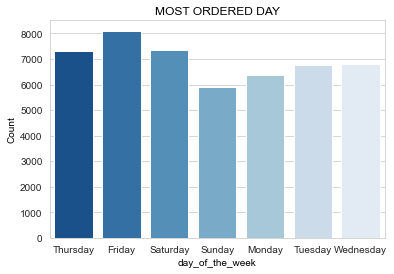

In [48]:
sns.countplot(data=pizzasales_df,x="order_dayname",palette="Blues_r")
plt.xlabel("day_of_the_week",fontsize=10,color="black")
plt.ylabel("Count",fontsize=10,color="black")
plt.title("MOST ORDERED DAY",fontsize=12, color="black")
plt.show()

It is already known that Fridays are the busiest. From this graph it can also be noted that Sundays fetched low sales

### Question 18 : To determine the sales per each hour and plot it

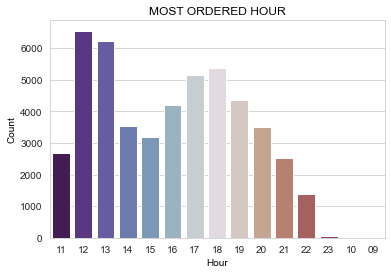

In [49]:
sns.countplot(data=pizzasales_df,x="Hour",palette="twilight_shifted")
plt.xlabel("Hour",fontsize=10,color="black")
plt.ylabel("Count",fontsize=10,color="black")
plt.title("MOST ORDERED HOUR",fontsize=12, color="black")
plt.show()

The sales btw 12 pm and 1 pm crossed 6000. And btw 4 pm and 7 pm the sales were above 4000.

To know how much it weighted with respect to whole day:

### Question 19 : Weightage of sales for each hour during the day

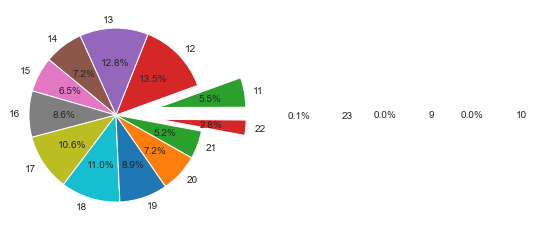

In [50]:
ques19_groupby = pizzasales_df.groupby(['Hour']).size().reset_index(name='count')
ques19_labels = []
for i in range(9,24):
    ques19_labels.append(i)
ques19_explode = [2.5,3.5,0.5,0,0,0,0,0,0,0,0,0,0,0.5,1.5]
plt.pie(ques19_groupby['count'],labels=ques19_labels,explode=ques19_explode,autopct="%1.1f%%")
plt.show()

It can be inferred that more than 25% of the day's sales happen btw 12 pm & 1 pm

### Question 20 : To know the lowest and highest rate of each pizza

In [51]:
unit_price_min = pizzasales_df['unit_price'].min()
unit_price_min

9.75

In [52]:
unit_price_max = pizzasales_df['unit_price'].max()
unit_price_max

35.95

### Question 21 : To know how the price of each pizza is varied for each category of pizza

<AxesSubplot:xlabel='pizza_category', ylabel='unit_price'>

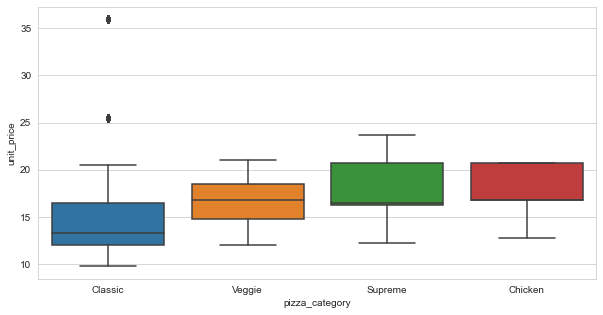

In [53]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.boxplot(data = pizzasales_df, x= 'pizza_category', y='unit_price')

Majoritly(excluding the outliers), Supreme pizza are costlier when compared to other categories and Classic being the 
most affordable. This can be the reason for it making the top most sales

### Question 22 : Calculating the total amount earned for each month

In [54]:
ques22_month = ['January','February','March','April','May','June','July','August','September','October','November',
               'December']

In [55]:
ques22_list = []
for i in range(12):
    i = i+1
    ques22_1 = pizzasales_df['total_price'].where(pizzasales_df['order_monthnum'] == i)
    ques22_revenue = ques22_1.sum().round(2)
    ques22_list.append(ques22_revenue)

In [56]:
monthly_revenue = {
    'Month' : ques22_month,
    'Amount_earned' : ques22_list
}

In [57]:
ques22_revenue_df = pd.DataFrame(monthly_revenue)
ques22_revenue_df

,Month,Amount_earned
0,January,69793.30
1,February,65159.60
2,March,70397.10
3,April,68736.80
4,May,71402.75
5,June,68230.20
6,July,72557.90
7,August,68278.25
8,September,64180.05
9,October,64027.60


July was the most revenue generating month followed by May. Both March and November had almost same revenue

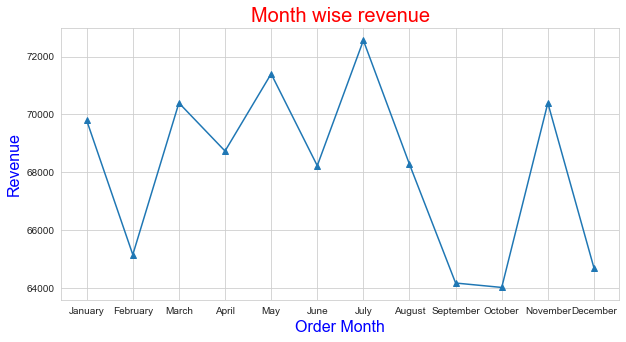

In [58]:
# plotting the graph
plt.figure(figsize=(10,5))
plt.xlabel("Order Month",size=16,color='blue')
plt.ylabel("Revenue",size=16,color='blue')
plt.title("Month wise revenue",size=20,color='red')
plt.plot(ques22_revenue_df['Month'], ques22_revenue_df['Amount_earned'],marker='^')
plt.show()

The revenue depends on the sales, that is the reason, the pattern is similar to question 16 results

Answering the same question through user input

In [59]:
revenue_input = input("Do you want to know all month's individual revenue from January till December? (Y/N) : ")
if revenue_input == 'Y':
    ques22_userinput_list = []
    for i in range(12):
        i = i+1
        ques22_totalprice = pizzasales_df[pizzasales_df['order_monthnum'] == i]['total_price']
        ques22_sum = ques22_totalprice.sum().round(2)
        ques22_userinput_list.append(ques22_sum)
    print("From Jan to Dec the revenues of each month are in order: {}".format(ques22_userinput_list))
else:
    desired_month = input("Enter the desired month(January,February etc.) : ")
    revenue_month = pizzasales_df[pizzasales_df['order_month'] == desired_month]
    Monthly_revenue = revenue_month['total_price'].sum().round(2)
    print("The Monthly revenue of the month of {} is {}".format(desired_month,Monthly_revenue))

Do you want to know all month's individual revenue from January till December? (Y/N) : N
Enter the desired month(January,February etc.) : January
The Monthly revenue of the month of January is 69793.3


### Question 23 : Calculating the amount generated for each pizza category for each month

In [60]:
def monthly_revenue():
    ques23_1 = {
        'pizza_category' : ['Classic','Chicken','Veggie','Supreme'],
        'Monthly_revenue' : x
    }
    ques23_revenue_df = pd.DataFrame(ques23_1)
    plt.figure(figsize=(5,5))
    for o,p in enumerate(x):
        plt.text(o,p,str(p),size=16)
    plt.title("Revenue for the month of {} for each pizza category".format(i))
    plt.plot(ques23_revenue_df['pizza_category'],ques23_revenue_df['Monthly_revenue'],linestyle="--",marker="*")
    plt.show

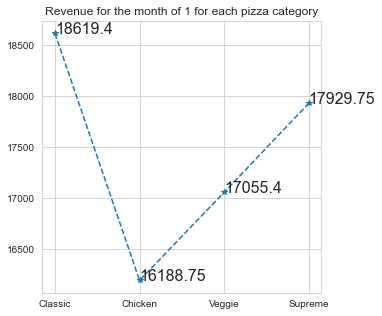

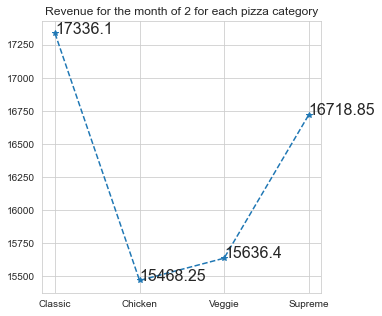

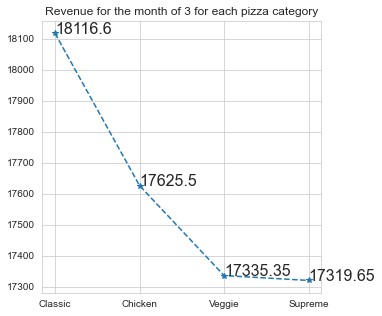

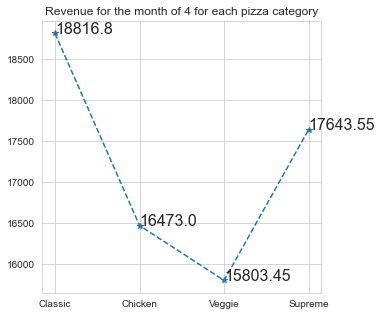

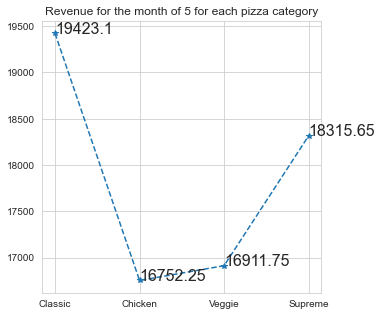

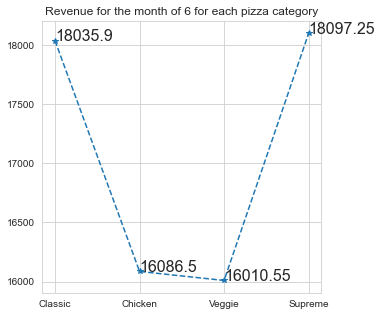

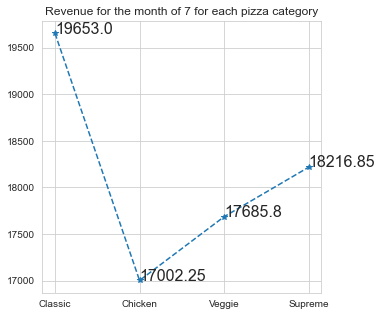

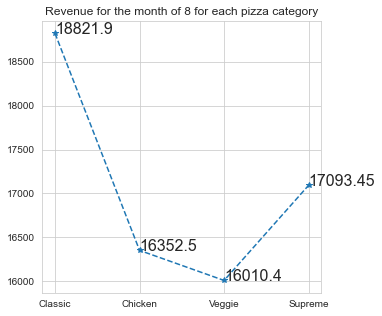

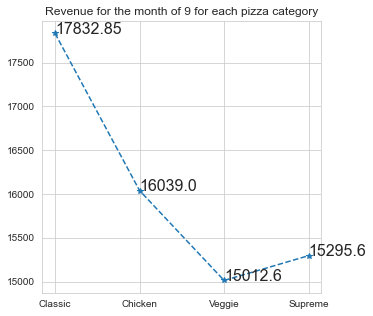

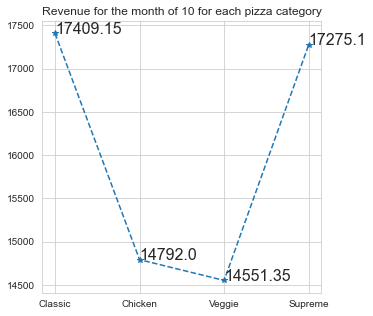

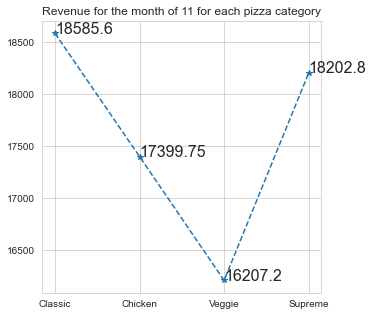

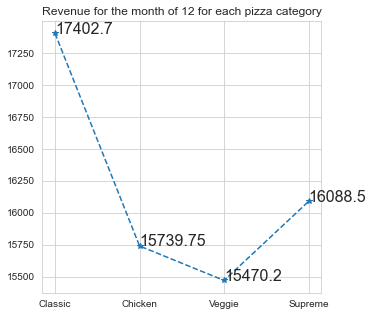

In [61]:
for i in range(12):
    x = []
    i = i+1
    ques23_1 = pizzasales_df[pizzasales_df['order_monthnum']==i][['pizza_category','total_price']]
    ques23_2 = ques23_1[ques23_1['pizza_category']=='Classic'].sum()['total_price'].round(2)
    ques23_3 = ques23_1[ques23_1['pizza_category']=='Chicken'].sum()['total_price'].round(2)
    ques23_4 = ques23_1[ques23_1['pizza_category']=='Veggie'].sum()['total_price'].round(2)
    ques23_5 = ques23_1[ques23_1['pizza_category']=='Supreme'].sum()['total_price'].round(2)
    x.append(ques23_2)
    x.append(ques23_3)
    x.append(ques23_4)
    x.append(ques23_5)
    monthly_revenue()